# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
fifa.shape

(18207, 20)

In [4]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

<font color=red>This assumption is not TRUE there are values in M and Values in K</font>

In [5]:
# Your code here:
fifa.Value.unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

**I have created a fuction to solve this issue**

In [6]:
def transform_money(val):
    euros = val.replace('€', '')
    if 'M' in euros:
        euros = euros.replace('M', '')
        euros = float(euros)*1000000
    elif 'K' in euros:
        euros = euros.replace('K', '')
        euros = float(euros)*1000
    return float(euros)

In [7]:
fifa['ValueNumeric'] =  fifa['Value'].apply(transform_money)

In [8]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [9]:
fifa.columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'PreferredFoot', 'Position', 'WeakFoot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']

In [10]:
model = ols('ValueNumeric ~ C(PreferredFoot)*C(Position)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(PreferredFoot),2.341622e+14,1.0,7.734728,5.422475e-03
C(Position),1.657002e+16,26.0,21.051242,2.211476e-97
C(PreferredFoot):C(Position),5.152828e+15,26.0,6.546369,5.153228e-23
Residual,5.477500e+17,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

**COMMENTS:**

Our p-value is very small. This means that we can reject the Null Hypothesis.
That is there are significant differences among groups

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [11]:
model = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

**COMMENTS:**

Our p-value is very small. This means that we can reject the Null Hypothesis.
That is there are significant differences among groups

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
# Your code here:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 21 columns):
Name             18207 non-null object
Age              18207 non-null int64
Nationality      18207 non-null object
Overall          18207 non-null int64
Potential        18207 non-null int64
Club             17966 non-null object
Value            18207 non-null object
PreferredFoot    18159 non-null object
Position         18147 non-null object
WeakFoot         18159 non-null float64
Acceleration     18159 non-null float64
SprintSpeed      18159 non-null float64
Stamina          18159 non-null float64
Strength         18159 non-null float64
LongShots        18159 non-null float64
Aggression       18159 non-null float64
Interceptions    18159 non-null float64
Positioning      18159 non-null float64
Vision           18159 non-null float64
Penalties        18159 non-null float64
ValueNumeric     18207 non-null float64
dtypes: float64(12), int64(3), object(6)
memory usage: 2.9+ MB


In [13]:
index_to_drop1 = fifa[fifa['Club'] != fifa['Club']].index
fifa = fifa.drop(index_to_drop1)

In [14]:
index_to_drop2 = fifa[fifa['Position'] != fifa['Position']].index
fifa = fifa.drop(index_to_drop2)

In [15]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 21 columns):
Name             17918 non-null object
Age              17918 non-null int64
Nationality      17918 non-null object
Overall          17918 non-null int64
Potential        17918 non-null int64
Club             17918 non-null object
Value            17918 non-null object
PreferredFoot    17918 non-null object
Position         17918 non-null object
WeakFoot         17918 non-null float64
Acceleration     17918 non-null float64
SprintSpeed      17918 non-null float64
Stamina          17918 non-null float64
Strength         17918 non-null float64
LongShots        17918 non-null float64
Aggression       17918 non-null float64
Interceptions    17918 non-null float64
Positioning      17918 non-null float64
Vision           17918 non-null float64
Penalties        17918 non-null float64
ValueNumeric     17918 non-null float64
dtypes: float64(12), int64(3), object(6)
memory usage: 3.0+ MB


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [16]:
X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']]) # adding a constant
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     453.4
Date:                Fri, 06 Sep 2019   Prob (F-statistic):          8.04e-193
Time:                        17:19:40   Log-Likelihood:            -3.0350e+05
No. Observations:               17918   AIC:                         6.070e+05
Df Residuals:                   17915   BIC:                         6.070e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -3.07e+06   1.97e+05    -15.600      

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

**COMMENT:** 
We have a  high F statistic. So, the variability between group means is much larger than within the group. It will be much easier to reject the null hypothesis that the group means are equal.

The R square is very small, so this model could only predict 4.8% of all cases.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [18]:
# Your code here:

X = sm.add_constant(fifa.Potential) # adding a constant
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        17:31:12   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

**COMMENT:** 

We have a linear model 
ValueNumeric = -3.544e+07 + 5.312e+05*Potential

The slope is 5.312e+05

The intercept -3.544e+0

We have a very high F statistic. So, the variability between group means is much larger than within the group. It will be much easier to reject the null hypothesis that the group means are equal.

The R square is small, so this model could only predict 33.6% of all cases.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [28]:
mean_velue_pot = fifa.groupby('Potential')['ValueNumeric'].agg('mean').reset_index()
mean_velue_pot

,Potential,ValueNumeric
0,48,1.000000e+04
1,50,2.000000e+04
2,51,3.000000e+04
3,52,2.800000e+04
4,53,1.833333e+04
5,54,4.142857e+04
6,55,6.166667e+04
7,56,5.869565e+04
8,57,6.534884e+04
9,58,7.258824e+04


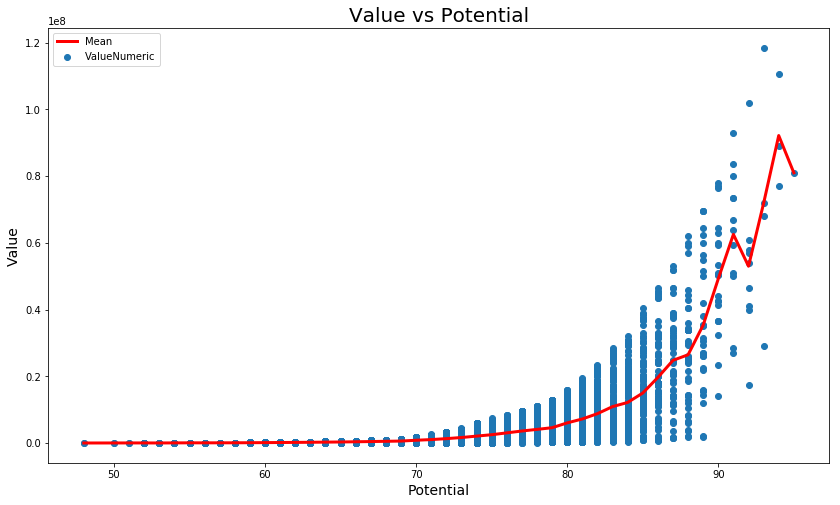

In [36]:
# Your code here:
plt.figure(figsize=(14,8))
plt.scatter(fifa['Potential'],fifa['ValueNumeric'])
plt.title('Value vs Potential', fontsize=20)
plt.xlabel('Potential', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.plot(mean_velue_pot['Potential'],mean_velue_pot['ValueNumeric'], color='red', linewidth=3, label='Mean')
plt.legend()
plt.show()